In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('3. Police Data.csv')
df=pd.DataFrame(df)

In [3]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(65535, 15)

In [5]:
df.describe(include='all')

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
count,65535,65535,0.0,61474,61481.000000,61228.000000,61475,61475,61475,65535,2479,61475,61475,61475,65535
unique,2651,1432,NaN,2,NaN,NaN,5,12,6,2,23,6,2,4,2
top,1/11/2012,11:00,NaN,M,NaN,NaN,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False
freq,69,280,NaN,45164,NaN,NaN,45747,37204,37204,63056,1074,56564,59215,47379,65017
mean,NaN,NaN,NaN,NaN,1967.791106,34.148984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,121.050106,12.760710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1965.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1978.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1985.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# stop_date    (converting stop_date to to_datetime)

In [6]:
df.stop_date=pd.to_datetime(df.stop_date)

# stop_time

In [7]:
#df.stop_time=pd.to_datetime(df.stop_time).dt.hour

In [8]:
df.drop('country_name',axis=1,inplace=True)

In [9]:
#df.search_type.value_counts()

In [10]:
mode=df.search_type.mode()[0]
df.search_type=df.search_type.fillna(mode)

In [11]:
df.dropna(inplace=True)

In [12]:
df.drop('driver_age_raw',axis=1,inplace=True) #deleting because we already have age related column

In [13]:
df.drop('violation_raw',axis=1,inplace=True) ##deleting because we already have violation related column

# driver_gender (gender of the driver)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='driver_gender', ylabel='count'>

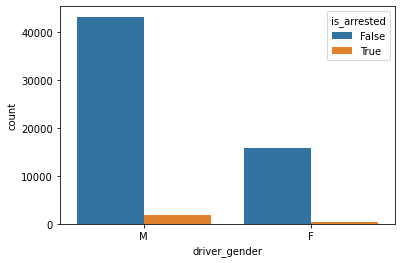

In [14]:
sns.countplot(df.driver_gender,hue=df.is_arrested)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='driver_gender', ylabel='count'>

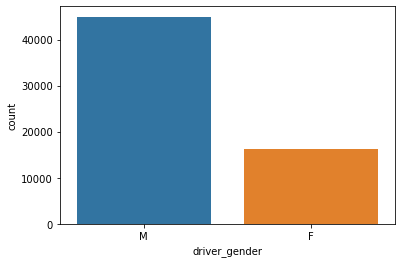

In [15]:
sns.countplot(df.driver_gender)

# driver_age

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='driver_age', ylabel='Density'>

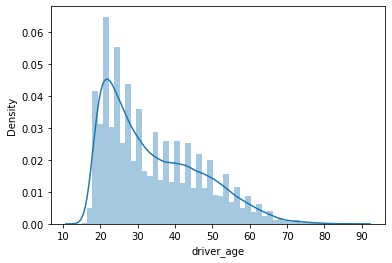

In [16]:
sns.distplot(df.driver_age)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='driver_age'>

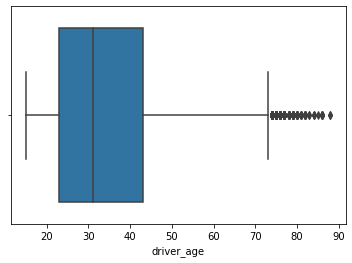

In [17]:
sns.boxplot(df.driver_age)

In [18]:
q1=df.driver_age.quantile(0.25)
q3=df.driver_age.quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)


In [19]:
df.drop(df[df.driver_age > upper].index,inplace=True,axis=0)

# driver_race

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='driver_race', ylabel='count'>

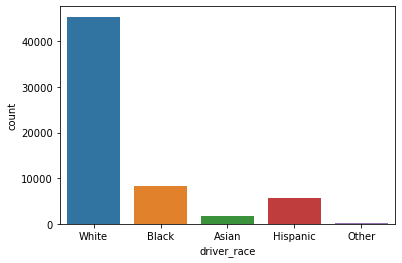

In [20]:
sns.countplot(df.driver_race)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='driver_race', ylabel='count'>

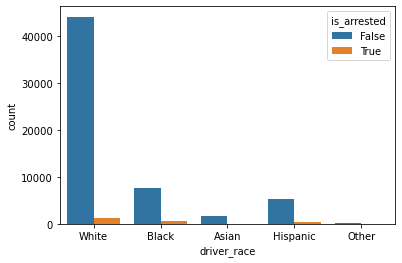

In [21]:
sns.countplot(df.driver_race,hue=df.is_arrested)

# violation  (target variable)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='violation', ylabel='count'>

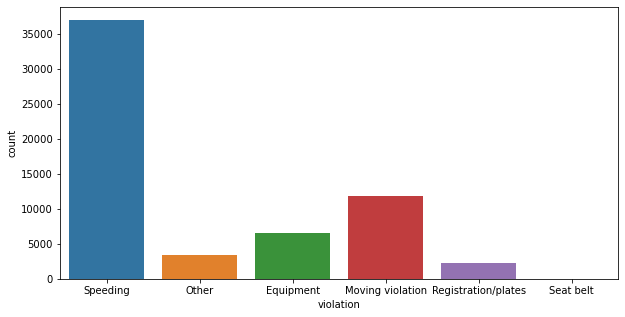

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(df.violation)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='violation', ylabel='count'>

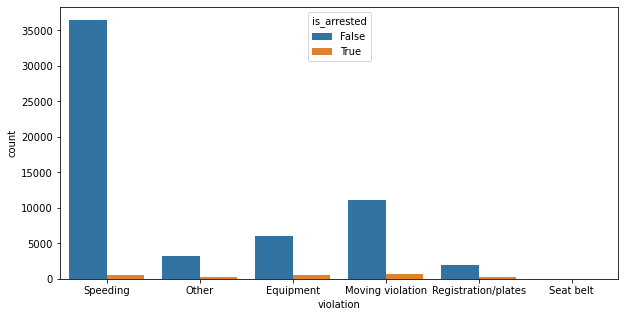

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(df.violation,hue=df.is_arrested)

# search_conducted

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='search_conducted', ylabel='count'>

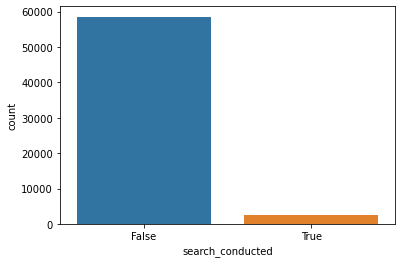

In [24]:
sns.countplot(df.search_conducted)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='search_conducted', ylabel='count'>

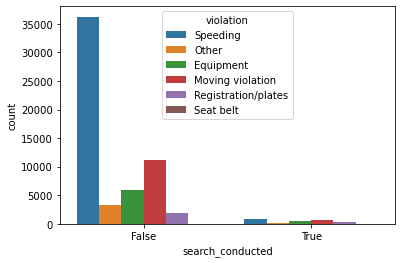

In [25]:
sns.countplot(df.search_conducted,hue=df.violation)

# search_type

In [26]:
df.drop('search_type',axis=1,inplace=True)

# stop_outcome

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stop_outcome', ylabel='count'>

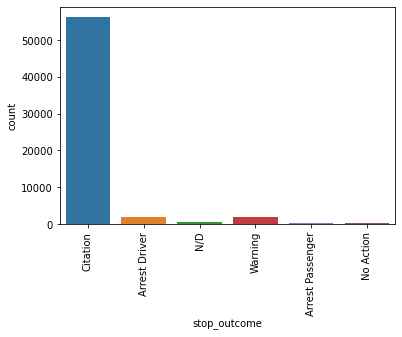

In [27]:
plt.xticks(rotation=90)
sns.countplot(df.stop_outcome)

# is_arrested

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_arrested', ylabel='count'>

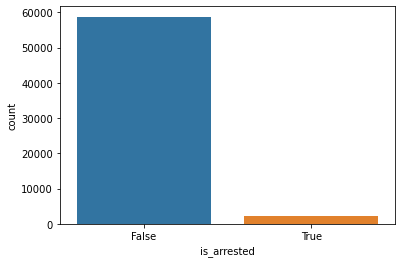

In [28]:
sns.countplot(df.is_arrested)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_arrested', ylabel='count'>

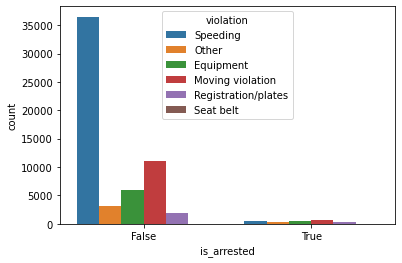

In [29]:
sns.countplot(df.is_arrested,hue=df.violation)

In [30]:
df.is_arrested.value_counts()

False    58776
True      2253
Name: is_arrested, dtype: int64

# stop_duration

In [31]:
df.stop_duration.value_counts()

0-15 Min     47048
16-30 Min    11349
30+ Min       2631
2                1
Name: stop_duration, dtype: int64

In [32]:
#we need to convert this column to int.i took the int as average of these range.

In [33]:
df['stop_duration'] = df['stop_duration'].replace({'2': '120','30+ Min':'30','16-30 Min':'15','0-15 Min':'8'})

In [34]:
df['stop_duration'] = df['stop_duration'].astype(int) #convering to int

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stop_duration', ylabel='count'>

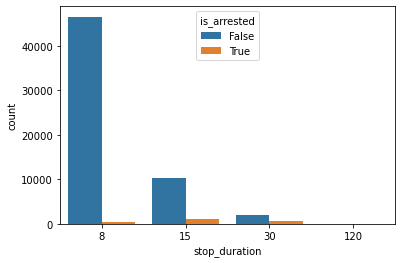

In [35]:
sns.countplot(df.stop_duration,hue=df.is_arrested)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stop_duration', ylabel='count'>

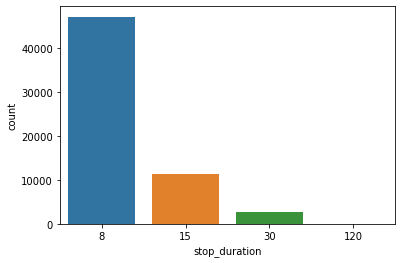

In [36]:
sns.countplot(df.stop_duration)

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stop_duration', ylabel='count'>

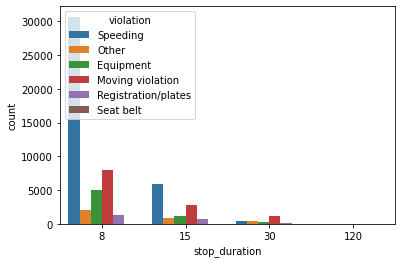

In [37]:
sns.countplot(df.stop_duration,hue=df.violation)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61029 entries, 0 to 65534
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           61029 non-null  datetime64[ns]
 1   stop_time           61029 non-null  object        
 2   driver_gender       61029 non-null  object        
 3   driver_age          61029 non-null  float64       
 4   driver_race         61029 non-null  object        
 5   violation           61029 non-null  object        
 6   search_conducted    61029 non-null  bool          
 7   stop_outcome        61029 non-null  object        
 8   is_arrested         61029 non-null  object        
 9   stop_duration       61029 non-null  int32         
 10  drugs_related_stop  61029 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 4.5+ MB


# drugs_related_stop

In [39]:
df.drugs_related_stop.value_counts()

False    60511
True       518
Name: drugs_related_stop, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drugs_related_stop', ylabel='count'>

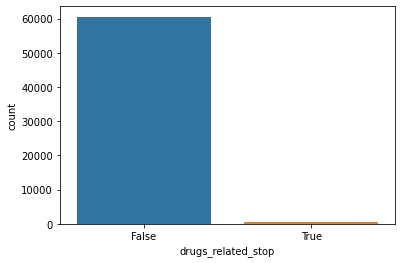

In [40]:
sns.countplot(df.drugs_related_stop)

In [41]:
df['year']=df['stop_date'].dt.year

In [42]:
df['month']=df['stop_date'].dt.month

In [43]:
df.drop('stop_date',axis=1,inplace=True)

In [44]:
def get_hour(time_string):
    return time_string.split(':')[0]

In [45]:
df['stop_time'] = df['stop_time'].apply(get_hour)

In [46]:
#df['stoptime'] = pd.to_datetime(df['stop_time'],format = '%H')

In [47]:
df.head()

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,month
0,1,M,20.0,White,Speeding,False,Citation,False,8,False,2005,1
1,8,M,40.0,White,Speeding,False,Citation,False,8,False,2005,1
2,23,M,33.0,White,Speeding,False,Citation,False,8,False,2005,1
3,17,M,19.0,White,Other,False,Arrest Driver,True,15,False,2005,2
4,10,F,21.0,White,Speeding,False,Citation,False,8,False,2005,3


# chisquare


In [48]:
from scipy.stats import chi2_contingency

In [49]:
#driver_gender
a=pd.crosstab(df.violation,df.driver_gender)
chi2_contingency(a)[1]   #less than 0.05

1.4453579076388324e-280

In [50]:
#driver_race
a=pd.crosstab(df.violation,df.driver_race)
chi2_contingency(a)[1]   #less than 0.05

0.0

In [51]:
#search_conducted
a=pd.crosstab(df.violation,df.search_conducted)
chi2_contingency(a)[1]   #less than 0.05

1.8333499225270287e-256

In [52]:
#stop_outcome
a=pd.crosstab(df.violation,df.stop_outcome)
chi2_contingency(a)[1]   #less than 0.05

0.0

In [53]:
#is_arrested
a=pd.crosstab(df.violation,df.is_arrested)
chi2_contingency(a)[1]   #less than 0.05

0.0

In [54]:
#drugs_related_stop
a=pd.crosstab(df.violation,df.drugs_related_stop)
chi2_contingency(a)[1]   #less than 0.05

4.1484779996856094e-43

In [55]:
#year
a=pd.crosstab(df.violation,df.year)
chi2_contingency(a)[1]   #less than 0.05

0.0

In [56]:
#month
a=pd.crosstab(df.violation,df.month)
chi2_contingency(a)[1]   #less than 0.05

8.777206148056804e-23

# ANOVA

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [58]:
#convert drivesr age to float
df['driver_age']=df['driver_age'].astype(float)

In [59]:
model = ols('driver_age ~ violation', data = df).fit()
anova = sm.stats.anova_lm(model, type = 2)
print(anova.round(decimals=5))

                df        sum_sq      mean_sq         F  PR(>F)
violation      5.0  2.792521e+05  55850.41306  365.4045     0.0
Residual   61023.0  9.327088e+06    152.84544       NaN     NaN


In [60]:
df.head()

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,month
0,1,M,20.0,White,Speeding,False,Citation,False,8,False,2005,1
1,8,M,40.0,White,Speeding,False,Citation,False,8,False,2005,1
2,23,M,33.0,White,Speeding,False,Citation,False,8,False,2005,1
3,17,M,19.0,White,Other,False,Arrest Driver,True,15,False,2005,2
4,10,F,21.0,White,Speeding,False,Citation,False,8,False,2005,3


# labelencoding

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
df.driver_gender=le.fit_transform(df.driver_gender)

In [63]:
df.driver_race=le.fit_transform(df.driver_race)

In [64]:
df.violation=le.fit_transform(df.violation)

In [65]:
df.search_conducted=le.fit_transform(df.search_conducted)

In [66]:
df.stop_outcome=le.fit_transform(df.stop_outcome)

In [67]:
df.is_arrested=le.fit_transform(df.is_arrested)

In [68]:
df.drugs_related_stop=le.fit_transform(df.drugs_related_stop)

In [69]:
#df.drop('stoptime',axis=1,inplace=True)

# smot

In [70]:
df.violation.value_counts()

5    37010
1    11815
0     6497
2     3465
3     2239
4        3
Name: violation, dtype: int64

In [71]:
from sklearn.utils import resample

In [72]:
five=df[df['violation']==5]
four=df[df['violation']==4]
three=df[df['violation']==3]
two=df[df['violation']==2]
one=df[df['violation']==1]
zero=df[df['violation']==0]

In [73]:
fournew =resample(four,replace=True,n_samples=len(five),random_state=23)
threenew =resample(three,replace=True,n_samples=len(five),random_state=23)
twonew =resample(two,replace=True,n_samples=len(five),random_state=23)
onenew =resample(one,replace=True,n_samples=len(five),random_state=23)
zeronew =resample(zero,replace=True,n_samples=len(five),random_state=23)




In [74]:
df=pd.concat([five,fournew,threenew,twonew,onenew,zeronew])

In [75]:
df.violation.value_counts()

5    37010
4    37010
3    37010
2    37010
1    37010
0    37010
Name: violation, dtype: int64

In [76]:
#df.drop('stop_time',axis=1,inplace=True) #dropping stop_time

# Splitting the Dataset

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x=df.drop('violation',axis=1)

In [79]:
y=df.violation

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lo=LogisticRegression()

In [83]:
lo.fit(xtrain,ytrain)

C:\Users\jonah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
ypred=lo.predict(xtest)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [86]:
#confusion_matrix(ytest,ypred)

In [87]:
accuracy_score(ytest,ypred)   #bad model

0.38016752229127265

# KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)

In [90]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [91]:
ypred=classifier.predict(xtest)

In [92]:
accuracy_score(ytest,ypred) #average model

0.8468431955327389

# Dicision tree

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
clf=DecisionTreeClassifier()

In [96]:
parm={'criterion': ['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,None],'min_samples_leaf':[2,4,6]}

In [97]:
grid_search = GridSearchCV(clf,parm ,cv=5)

In [98]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None],
                         'min_samples_leaf': [2, 4, 6]})

In [99]:
grid_search.best_params_ # we got the best parameter for the disision tree

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}

In [100]:
entropy=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None,min_samples_leaf=2)

In [101]:
entropy.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=1)

In [102]:
ypred=entropy.predict(xtest)

In [103]:
accuracy_score(ytest,ypred) #good model

0.8925740790777268

# Random forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf=RandomForestClassifier()

In [106]:
params={
    'n_estimators':[40,80,100,200],
    'max_features':['sqrt',0.25,0.5,0.75,1],
    'min_samples_split':[2,4,6]
}

In [107]:
gd=GridSearchCV(rf,params,cv=3)

In [108]:
gd.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.25, 0.5, 0.75, 1],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [40, 80, 100, 200]})

In [109]:
ypred = gd.best_estimator_.predict(xtest)

In [110]:
accuracy_score(ytest, ypred)

0.9349725299468612

In [111]:
gd.best_params_ #we got the best parameters for random forest

{'max_features': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [112]:
rdd=RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='entropy',max_features=0.25,random_state=1,min_samples_split=2)

In [113]:
rdd.fit(xtrain,ytrain)
ypred=rdd.predict(xtest)

In [114]:
accuracy_score(ytest,ypred) #good model

0.9340493560299018

# ADAboost

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
ad=AdaBoostClassifier(random_state=1)


In [117]:
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)

In [118]:
accuracy_score(ytest,ypred) #bad model

0.3556246059623525

# SVM

In [119]:
from sklearn.svm import SVC

In [120]:
clf = SVC(kernel='rbf')

In [121]:
clf.fit(xtrain, ytrain)

SVC()

In [122]:
ypred = clf.predict(xtest)

In [123]:
accuracy_score(ytest,ypred)

0.31270827704224086